# Задача к лекции "Восстановление кривой доходности"
Взять значения базовых ставок https://sebgroup.com/large-corporates-and-institutions/prospectuses-and-downloads/rates/base-rates
и цену процентных свопов https://sebgroup.com/large-corporates-and-institutions/prospectuses-and-downloads/rates/swap-rates
Восстановить кривую для Вашей валюты 

In [24]:
def getVariant(email):
    ccy = ['NOK', 'SEK', 'DKK', 'EUR']
    h = hash(email)
    ccy1 = ccy[h % 5]
    print ('Task 1: 5Y curve for' + ccy1)
getVariant('matvey-21@yandex.ru')

Task 1: 5Y curve forDKK


0.0010003713434593717 [0.00099975]


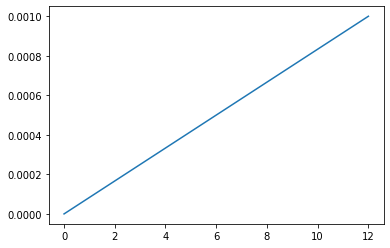

In [3]:
s0 = 0.0*1e-2
s1 = 0.1*1e-2

r0 = s0

import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as pt

# Дискаунт фактор из процентной ставки
# для простоты капитализация процентов не учитывается
def DF(L,m):
    return 1.0 / (1.0 + L*m/12)

def DF_exp(L,m):
    return np.exp(-L*m/12)


def S1(r12, r0, s1):
    r6 = 0.5* (r0 + r12)
    df6 = DF(r6, 6)
    df12 = DF(r12, 12)
    price = 2*(1 - df12) / (df6 + df12)
    return price - s1

def S1_loglin(r12, r0, s):
    df12 = DF_exp(r12, 12)
    df6 = np.sqrt(df12)
    price = 2*(1 - df12) / (df6 + df12)
    return price - s


r12 = scipy.optimize.broyden1(lambda x: S1(x, r0, s1), r0)
r12_loglin = scipy.optimize.fsolve(lambda x: S1_loglin(x, r0, s1), r0)

print(r12, r12_loglin)

pt.plot([0,12], [r0, r12])

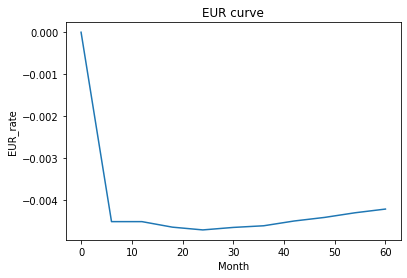

In [5]:
import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as plt

s1=-0.45*1e-2
s2=-0.47*1e-2
s3=-0.46*1e-2
s4=-0.44*1e-2
s5=-0.42*1e-2
r0=0*1e-2
libors=[]
libors.append(r0)
# Дискаунт фактор из процентной ставки
# для простоты капитализация процентов не учитывается

#В самом задании использую непрерывное начисление процентов и лог-линейную интерполяцию. Функция соответствует непрерывному начислению, т.е это логарифм.
#Промежуточные значения в середине года так же вычислены с помощью лог линейной интерполяции.

def DF(L,m):
    return 1.0 / (1.0 + L*m/12)

def DF_exp(L,m):
    return np.exp(-L*m/12)

def rate(D,m):
    return (np.log(1/D))*12/m

def S1_loglin(r12, r0, s):
    df12 = DF_exp(r12, 12)
    df6 = np.sqrt(df12)
    price = 2*(1 - df12) / (df6 + df12)
    return price - s

r12_loglin = scipy.optimize.broyden1(lambda x: S1_loglin(x, r0, s1), r0)
df12 = DF_exp(r12_loglin, 12)
df6 = np.sqrt(df12)
r6=rate(df6,6)
libors.append(r6)
libors.append(r12_loglin)

def S2_loglin(r24,r12,s):
    df12 = DF_exp(r12, 12)
    df6 = np.sqrt(df12)
    df24=DF_exp(r24,24)
    df18=np.sqrt(df12*df24)
    price = 2*(1 - df24) / (df6 + df12 + df12+ df24)
    return price - s

r24_loglin = scipy.optimize.fsolve(lambda x: S2_loglin(x, r12_loglin, s2), r12_loglin)
df24 = DF_exp(r24_loglin, 24)
df18 = np.sqrt(df12*df24)
r18=rate(df18,18)
libors.append(r18)
libors.append(r24_loglin)

def S3_loglin(r36,r24,r12,s):
    df12 = DF_exp(r12, 12)
    df6 = np.sqrt(df12)
    df24=DF_exp(r24,24)
    df18=np.sqrt(df12*df24)
    df36=DF_exp(r36,36)
    df30=np.sqrt(df36*df24)
    price = 2*(1 - df36) / (df6 + df12 + df12+ df24+df30+df36)
    return price - s

r36_loglin = scipy.optimize.fsolve(lambda x: S3_loglin(x, r24_loglin, r12_loglin, s3), r24_loglin)
df36 = DF_exp(r36_loglin, 36)
df30 = np.sqrt(df36*df24)
r30=rate(df30,30)
libors.append(r30)
libors.append(r36_loglin)

def S4_loglin(r48,r36,r24,r12,s):
    df12 = DF_exp(r12, 12)
    df6 = np.sqrt(df12)
    df24=DF_exp(r24,24)
    df18=np.sqrt(df12*df24)
    df36=DF_exp(r36,36)
    df30=np.sqrt(df36*df24)
    df48=DF_exp(r48,48)
    df42=np.sqrt(df48*df36)
    price = 2*(1 - df48)/ (df6 + df12 + df12+ df24+df30+df36+df42+df48)
    return price - s

r48_loglin = scipy.optimize.fsolve(lambda x: S4_loglin(x, r36_loglin, r24_loglin, r12_loglin, s4), r36_loglin)
df48 = DF_exp(r48_loglin, 48)
df42 = np.sqrt(df36*df48)
r42=rate(df42,42)
libors.append(r42)
libors.append(r48_loglin)

def S5_loglin(r60,r48,r36,r24,r12,s):
    df12 = DF_exp(r12, 12)
    df6 = np.sqrt(df12)
    df24=DF_exp(r24,24)
    df18=np.sqrt(df12*df24)
    df36=DF_exp(r36,36)
    df30=np.sqrt(df36*df24)
    df48=DF_exp(r48,48)
    df42=np.sqrt(df48*df36)
    df60=DF_exp(r60,60)
    df54=np.sqrt(df60*df48)
    price = 2*(1 - df60)/ (df6 + df12 + df12+ df24+df30+df36+df42+df48+df54+df60)
    return price - s

r60_loglin = scipy.optimize.fsolve(lambda x: S5_loglin(x, r48_loglin, r36_loglin, r24_loglin, r12_loglin, s5), r48_loglin)
df60 = DF_exp(r60_loglin, 60)
df54 = np.sqrt(df60*df48)
r54=rate(df54,54)
libors.append(r54)
libors.append(r60_loglin)

plt.plot([0,6,12,18,24,30,36,42,48,54,60] , libors)
plt.title('EUR curve')
plt.xlabel('Month')
plt.ylabel('EUR_rate')
plt.show()